# EDA Project: COVID-19 Clinical Trials

## Project
This is a project on Exploratory Data Analysis on COVID-19 Clinical Trials using ClinicalTrials.gov dataset. 

## Dataset Description

### Origin: [Kaggle](https://www.kaggle.com/parulpandey/covid19-clinical-trials-dataset)

ClinicalTrials.gov is a database of privately and publicly funded clinical studies conducted around the world. It is maintained by the National Institute of Health. All data is publicly available and the site provides a direct download feature which makes it super easy to use relevant data for analysis.

This dataset consists of clinical trials related to COVID 19 studies presented on the site.

The dataset consists of XML files where each XML file corresponds to one study. The filename is the NCT number which a unique identifier of a study in ClinicalTrials repository. Additionally, a CSV file has also been provided, which might not have as much information as contained in the XML file, but does give sufficient information.


### Acknowledgements

ClinicalTrials.gov is a resource provided by the U.S. National Library of Medicine.

## Interventional study (clinical trial)
A type of clinical study in which participants are assigned to groups that receive one or more intervention/treatment (or no intervention) so that researchers can evaluate the effects of the interventions on biomedical or health-related outcomes. The assignments are determined by the study's protocol. Participants may receive diagnostic, therapeutic, or other types of interventions.

## Investigation of data columns

In [391]:
import pandas as pd
import numpy as np

In [392]:
clinical_trials = pd.read_csv('data/COVID clinical trials.csv')
clinical_trials.columns.tolist()

['Rank',
 'NCT Number',
 'Title',
 'Acronym',
 'Status',
 'Study Results',
 'Conditions',
 'Interventions',
 'Outcome Measures',
 'Sponsor/Collaborators',
 'Gender',
 'Age',
 'Phases',
 'Enrollment',
 'Funded Bys',
 'Study Type',
 'Study Designs',
 'Other IDs',
 'Start Date',
 'Primary Completion Date',
 'Completion Date',
 'First Posted',
 'Results First Posted',
 'Last Update Posted',
 'Locations',
 'Study Documents',
 'URL']

## What do they mean?
I searched in the [clinical trials website](https://clinicaltrials.gov/ct2/about-studies/glossary) the definition of some of these variables.

### NCT number
A unique identification code given to each clinical study record registered on ClinicalTrials.gov. The format is "NCT" followed by an 8-digit number (for example, NCT00000419). Also called the ClinicalTrials.gov identifier.

### Recruitment status
Not yet recruiting: The study has not started recruiting participants.
Recruiting: The study is currently recruiting participants.
Enrolling by invitation: The study is selecting its participants from a population, or group of people, decided on by the researchers in advance. These studies are not open to everyone who meets the eligibility criteria but only to people in that particular population, who are specifically invited to participate.
Active, not recruiting: The study is ongoing, and participants are receiving an intervention or being examined, but potential participants are not currently being recruited or enrolled.
Suspended: The study has stopped early but may start again.
Terminated: The study has stopped early and will not start again. Participants are no longer being examined or treated.
Completed: The study has ended normally, and participants are no longer being examined or treated (that is, the last participant's last visit has occurred).
Withdrawn: The study stopped early, before enrolling its first participant.
Unknown: A study on ClinicalTrials.gov whose last known status was recruiting; not yet recruiting; or active, not recruiting but that has passed its completion date, and the status has not been last verified within the past 2 years.


### Phase
The stage of a clinical trial studying a drug or biological product, based on definitions developed by the U.S. Food and Drug Administration (FDA). The phase is based on the study's objective, the number of participants, and other characteristics. There are five phases: Early Phase 1 (formerly listed as Phase 0), Phase 1, Phase 2, Phase 3, and Phase 4. Not Applicable is used to describe trials without FDA-defined phases, including trials of devices or behavioral interventions.
#### Phase 1
A phase of research to describe clinical trials that focus on the safety of a drug. They are usually conducted with healthy volunteers, and the goal is to determine the drug's most frequent and serious adverse events and, often, how the drug is broken down and excreted by the body. These trials usually involve a small number of participants.
#### Phase 2
A phase of research to describe clinical trials that gather preliminary data on whether a drug works in people who have a certain condition/disease (that is, the drug's effectiveness). For example, participants receiving the drug may be compared to similar participants receiving a different treatment, usually an inactive substance (called a placebo) or a different drug. Safety continues to be evaluated, and short-term adverse events are studied.
#### Phase 3
A phase of research to describe clinical trials that gather more information about a drug's safety and effectiveness by studying different populations and different dosages and by using the drug in combination with other drugs. These studies typically involve more participants.
#### Phase 4
A phase of research to describe clinical trials occurring after FDA has approved a drug for marketing. They include postmarket requirement and commitment studies that are required of or agreed to by the study sponsor. These trials gather additional information about a drug's safety, efficacy, or optimal use.
Phase Not Applicable
Describes trials without FDA-defined phases, including trials of devices or behavioral interventions.

### Enrollment
The number of participants in a clinical study. The "estimated" enrollment is the target number of participants that the researchers need for the study.

### Study type
Describes the nature of a clinical study. Study types include interventional studies (also called clinical trials), observational studies (including patient registries), and expanded access.

### Primary completion date
The date on which the last participant in a clinical study was examined or received an intervention to collect final data for the primary outcome measure. Whether the clinical study ended according to the protocol or was terminated does not affect this date. For clinical studies with more than one primary outcome measure with different completion dates, this term refers to the date on which data collection is completed for all the primary outcome measures. The "estimated" primary completion date is the date that the researchers think will be the primary completion date for the study.

### First posted
The date on which the study record was first available on ClinicalTrials.gov after National Library of Medicine (NLM) quality control (QC) review has concluded. There is typically a delay of a few days between the date the study sponsor or investigator submitted the study record and the first posted date.

### Results first posted
The date on which summary results information was first available on ClinicalTrials.gov after National Library of Medicine (NLM) quality control (QC) review has concluded. There is typically a delay between the date the study sponsor or investigator first submits summary results information (the results first submitted date) and the results first posted date. Some results information may be available at an earlier date if Results First Posted with QC Comments.

### Last update posted
The most recent date on which changes to a study record were made available on ClinicalTrials.gov.

### Location
Locations of the clinical studies.

In [393]:
clinical_trials.head()
clinical_trials.shape

(5783, 27)

For these exploratory analisys I decided to keep the following columns:

| Parameter | Short Description | Type |
| --- | --- | --- |
| *'NCT Number'* | unique ID | ID |
| *'Status'* | recruitment status | categorical |
| *'Study Results'* | clinical trial has results or not | categorial | 
| *'Gender'* | gender information of the enrolled participans | categorical |
| *'Age'* | age range of the enrolled participants |  categorical |
| *'Phases'* | clinical trial phase | categorical |
| *'Enrollment'* | number of enrolled participants | quantitative |
| *'Funded Bys'* | funding intitutions | categorical |
| *'Study Type'* | study type | categorical |
| *'Start Date'* | start date of the clinical trial | quatitative |
| *'Primary Completion Date'* | date on which the last participant in a clinical study was examined | quatitative |
| *'Completion Date'* | date the study is completed | quatitative | 
| *'First Posted'* |  date on which the study record was first available on ClinicalTrials.gov | quatitative |
| *'Results First Posted'* | date on which summary results information was first available on ClinicalTrials.gov |  quatitative |
| *'Last Update Posted'* |  most recent date on which changes to a study record were made available on ClinicalTrials.gov | quatitative |
|*'Locations'* | location of the clinical studies | categorical |


In [394]:
columns = ['NCT Number',
 'Status',
 'Study Results',
 'Gender',
 'Age',
 'Phases',
 'Enrollment',
 'Study Type',
 'Start Date',
 'Primary Completion Date',
 'Completion Date',
 'First Posted',
 'Results First Posted',
 'Last Update Posted',
 'Locations']

In [395]:
clinical_trials_reduced = clinical_trials[columns]

In [396]:
clinical_trials_reduced.head()

,NCT Number,Status,Study Results,Gender,Age,Phases,Enrollment,Study Type,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations
0,NCT04785898,"Active, not recruiting",No Results Available,All,"18 Years and older (Adult, Older Adult)",Not Applicable,1000.0,Interventional,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ..."
1,NCT04595136,Not yet recruiting,No Results Available,All,"18 Years and older (Adult, Older Adult)",Phase 1|Phase 2,60.0,Interventional,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia"
2,NCT04395482,Recruiting,No Results Available,All,"18 Years and older (Adult, Older Adult)",NaN,500.0,Observational,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P..."
3,NCT04416061,"Active, not recruiting",No Results Available,All,"Child, Adult, Older Adult",NaN,2500.0,Observational,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho..."
4,NCT04395924,Recruiting,No Results Available,Female,18 Years to 48 Years (Adult),NaN,50.0,Observational,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France"


In [397]:
clinical_trials_reduced.dtypes

NCT Number                  object
Status                      object
Study Results               object
Gender                      object
Age                         object
Phases                      object
Enrollment                 float64
Study Type                  object
Start Date                  object
Primary Completion Date     object
Completion Date             object
First Posted                object
Results First Posted        object
Last Update Posted          object
Locations                   object
dtype: object

## Transforming date columns in datetime
- Checking date differences: how long does a trial takes?
- Does it depend on the number of participants?

In [398]:
date_columns = ['Start Date', 'Primary Completion Date','Completion Date','First Posted','Results First Posted', 'Last Update Posted']
clinical_trials_reduced.loc[:, date_columns] = clinical_trials_reduced.loc[:, date_columns].apply(pd.to_datetime, errors='coerce')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [399]:
clinical_trials_reduced.dtypes

NCT Number                         object
Status                             object
Study Results                      object
Gender                             object
Age                                object
Phases                             object
Enrollment                        float64
Study Type                         object
Start Date                 datetime64[ns]
Primary Completion Date    datetime64[ns]
Completion Date            datetime64[ns]
First Posted               datetime64[ns]
Results First Posted       datetime64[ns]
Last Update Posted         datetime64[ns]
Locations                          object
dtype: object

## Checklist for treating data
## 1. Checking nan values

In [400]:
clinical_trials_reduced.isna().sum()

NCT Number                    0
Status                        0
Study Results                 0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Study Type                    0
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
dtype: int64

I am going to remove columns *Results First Posted* and *Phases* since they correspond to 99.4% and 42.6% of the total data in their respective columns.

In [401]:
clinical_trials_reduced = clinical_trials_reduced.drop(['Results First Posted', 'Phases'], axis=1)

In [402]:
clinical_trials_reduced.isna().sum()

NCT Number                   0
Status                       0
Study Results                0
Gender                      10
Age                          0
Enrollment                  34
Study Type                   0
Start Date                  34
Primary Completion Date     36
Completion Date             36
First Posted                 0
Last Update Posted           0
Locations                  585
dtype: int64



I am wondering if the 34/36 nan values in columns *Start Date*, *Primary Completion Date*, and *Completion Date* are mostly the same.

In [403]:
start_date = clinical_trials_reduced['Start Date'].isna()
primary_completion_date = clinical_trials_reduced['Primary Completion Date'].isna()
completion_date = clinical_trials_reduced['Completion Date'].isna()

In [404]:
if primary_completion_date.equals(completion_date):
    print('Missing values in columns \'Primary Completion Date\' and \'Completion Date\' are the same')

Missing values in columns 'Primary Completion Date' and 'Completion Date' are the same


In [405]:
clinical_trials_reduced.dropna(subset=['Primary Completion Date', 'Completion Date'], inplace=True)

In [406]:
clinical_trials_reduced.isna().sum()

NCT Number                   0
Status                       0
Study Results                0
Gender                       8
Age                          0
Enrollment                   0
Study Type                   0
Start Date                   0
Primary Completion Date      0
Completion Date              0
First Posted                 0
Last Update Posted           0
Locations                  571
dtype: int64

We can conclude the 34 missing values in the *Start Date* column corresponded to the same trial with the mising values in the *Primary Completion Date*, and *Completion Date* columns.

The removal of these rows also removed the missing values in the *Enrollement* row and 2 missing values in the *Gender* column and 14 values from 'Location' columns.

Since I want to perform an analysis based on location, I am going to remove the rows with nan values in *Location* column.

In [407]:
clinical_trials_reduced.dropna(subset=['Locations'], inplace=True)

In [408]:
clinical_trials_reduced.isna().sum()

NCT Number                 0
Status                     0
Study Results              0
Gender                     8
Age                        0
Enrollment                 0
Study Type                 0
Start Date                 0
Primary Completion Date    0
Completion Date            0
First Posted               0
Last Update Posted         0
Locations                  0
dtype: int64

In [409]:
clinical_trials_reduced.Gender.value_counts()

All       4976
Female     150
Male        42
Name: Gender, dtype: int64

Based on the table below, I am assume the missing values in the *Gender* column are considered as 'All'

In [410]:
clinical_trials_reduced.Gender.fillna('All', inplace=True)

In [411]:
clinical_trials_reduced.isna().sum()

NCT Number                 0
Status                     0
Study Results              0
Gender                     0
Age                        0
Enrollment                 0
Study Type                 0
Start Date                 0
Primary Completion Date    0
Completion Date            0
First Posted               0
Last Update Posted         0
Locations                  0
dtype: int64

In [412]:
clinical_trials_reduced.shape

(5176, 13)

In [413]:
proportion = 5176/5783*100
print(f'After removing missing values, the reduced dataset contains {round(proportion,1)}% of the original one.')

After removing missing values, the reduced dataset contains 89.5% of the original one.


## 2: Drop duplicates

In [414]:
clinical_trials_reduced.duplicated().sum()

0

There is no duplicated data in the dataset.

## 3. Irrelevant Data

I already removed the columns I think are not relevant to this project.

## 4. Categorical values

This dataset has a number of categorical variables. Let's check their unique values and organise their categories in a better way and clean column values if necessary.

In [416]:
categorical_variables = ['Status', 'Study Results', 'Gender', 'Age', 'Study Type','Locations']

In [417]:
for var in categorical_variables:
    print(var, clinical_trials_reduced[var].nunique())

Status 8
Study Results 2
Gender 3
Age 395
Study Type 2
Locations 4241


In [418]:
clinical_trials_reduced.Status.unique()

array(['Active, not recruiting', 'Not yet recruiting', 'Recruiting',
       'Enrolling by invitation', 'Suspended', 'Completed', 'Withdrawn',
       'Terminated'], dtype=object)

In [419]:
clinical_trials_reduced['Study Results'].unique()

array(['No Results Available', 'Has Results'], dtype=object)

In [420]:
clinical_trials_reduced['Gender'].unique()

array(['All', 'Female', 'Male'], dtype=object)

In [421]:
clinical_trials_reduced['Age'].unique()

array(['18 Years and older \xa0 (Adult, Older Adult)',
       'Child, Adult, Older Adult', '18 Years to 48 Years \xa0 (Adult)',
       '18 Years to 75 Years \xa0 (Adult, Older Adult)',
       '18 Years to 45 Years \xa0 (Adult)',
       '18 Years to 99 Years \xa0 (Adult, Older Adult)',
       '18 Years to 55 Years \xa0 (Adult)',
       '15 Years and older \xa0 (Child, Adult, Older Adult)',
       '18 Years to 80 Years \xa0 (Adult, Older Adult)',
       '45 Years and older \xa0 (Adult, Older Adult)',
       '20 Years to 100 Years \xa0 (Adult, Older Adult)',
       '8 Years to 88 Years \xa0 (Child, Adult, Older Adult)',
       '5 Years to 65 Years \xa0 (Child, Adult, Older Adult)',
       'up to 99 Years \xa0 (Child, Adult, Older Adult)',
       '18 Years to 85 Years \xa0 (Adult, Older Adult)',
       '18 Years to 65 Years \xa0 (Adult, Older Adult)',
       'up to 29 Days \xa0 (Child)',
       '18 Years to 70 Years \xa0 (Adult, Older Adult)',
       '18 Years to 59 Years \xa0 (Adult)',
  

In [422]:
clinical_trials_reduced['Age'] = clinical_trials_reduced['Age'].apply(lambda s: s[s.find("(")+1:s.find(")")])

In [423]:
clinical_trials_reduced['Age'].value_counts()

Adult, Older Adult           3902
Child, Adult, Older Adul      432
Adult                         304
Child, Adult, Older Adult     289
Child, Adult                   92
Child                          90
Older Adult                    67
Name: Age, dtype: int64

In [424]:
clinical_trials_reduced['Age'] = clinical_trials_reduced['Age'].replace('Child, Adult, Older Adul','Child, Adult, Older Adult')

In [425]:
clinical_trials_reduced['Age'].value_counts()

Adult, Older Adult           3902
Child, Adult, Older Adult     721
Adult                         304
Child, Adult                   92
Child                          90
Older Adult                    67
Name: Age, dtype: int64

In [426]:
clinical_trials_reduced['Study Type'].value_counts()

Interventional    2969
Observational     2207
Name: Study Type, dtype: int64

In [427]:
clinical_trials_reduced['Country'] = clinical_trials_reduced['Locations'].apply(lambda s: s.split(',')[-1].strip())

In [428]:
clinical_trials_reduced['Country'].unique()

array(['France', 'Colombia', 'San Marino', 'Hong Kong', 'Vietnam',
       'United States', 'India', 'Israel', 'Chile', 'Italy',
       'United Kingdom', 'United Arab Emirates', 'Norway', 'Brazil',
       'Bangladesh', 'Denmark', 'Spain', 'Switzerland', 'Finland',
       'Poland', 'Egypt', 'Turkey', 'Indonesia', 'Canada', 'Belgium',
       'Pakistan', 'Sweden', 'Hungary', 'Albania', 'Sudan', 'Nigeria',
       'Slovenia', 'Islamic Republic of', 'Martinique', 'Portugal',
       'Republic of', 'Germany', 'Thailand', 'Japan', 'Argentina',
       'Zambia', 'China', 'Mexico', 'Singapore', 'Costa Rica',
       'Philippines', 'Belarus', 'Saudi Arabia', 'Czechia', 'Peru',
       'Netherlands', 'Greece', 'Mongolia', 'Taiwan', 'Tunisia',
       'Russian Federation', 'Puerto Rico', 'Iceland', 'Australia',
       'Slovakia', 'Ecuador', 'South Africa', 'Kenya', 'Malaysia', 'Mali',
       'Croatia', 'Luxembourg', 'Kuwait', 'Paraguay', 'North Macedonia',
       'Monaco', 'Austria', 'French Guiana', 'Qa

In [429]:
clinical_trials_reduced.drop(['Locations'], axis=1, inplace=True)

## 5. Insights

In [336]:
import matplotlib.pyplot as plt

### Trials per country

In [337]:
results_by_country = clinical_trials_reduced.groupby(by=['Country'])['NCT Number'].count().sort_values()
results_by_country_percentage = clinical_trials_reduced.groupby(by=['Country'])['NCT Number'].count().sort_values()
results_by_country_percentage = results_by_country_percentage.reset_index()
results_by_country_percentage.rename(columns={'NCT Number': 'Percentage'},inplace=True)
mask_under = results_by_country_percentage['Percentage'] < 0.045
mask_over = results_by_country_percentage['Percentage'] >= 0.045
others_percentage = results_by_country_percentage[mask_over].sum()[1]
results_by_country_percentage_reduced = results_by_country_percentage[-5:].reset_index(drop=True)
results_by_country_percentage_reduced = results_by_country_percentage_reduced.append({'Country': 'Others', 'Percentage': others_percentage},ignore_index=True)
results_by_country_percentage_reduced

,Country,Percentage
0,Italy,234
1,Spain,234
2,United Kingdom,305
3,France,646
4,United States,1250
5,Others,5176


/var/folders/j1/v9nyz79d7v7f5yww68cxr6tr0000gn/T/ipykernel_1481/3981604409.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(results_by_country.index[-10:],rotation=90, ha='right')


Text(0.5, 1.0, 'Percetage of \n trials / country')

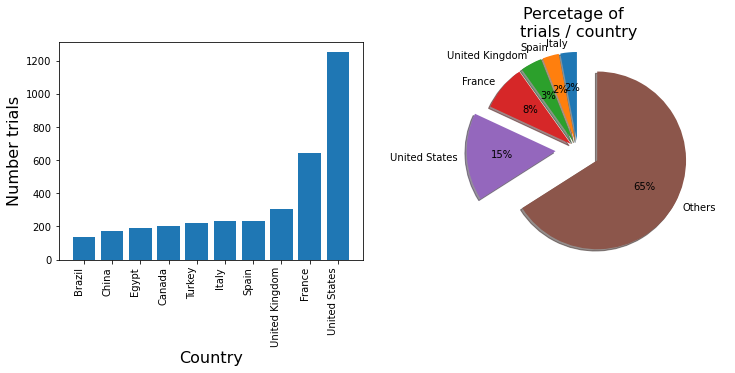

In [338]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].bar(results_by_country.index[-10:], results_by_country[-10:])
ax[0].set_ylabel('Number trials',fontsize=16)
ax[0].set_xlabel('Country',fontsize=16)
ax[0].set_xticklabels(results_by_country.index[-10:],rotation=90, ha='right')
explode = (0.1,0.1,0.1,0.1, 0.25, 0.25)
ax[1].pie(results_by_country_percentage_reduced['Percentage'], \
          labels=results_by_country_percentage_reduced['Country'],\
          autopct='%.d%%', explode=explode, shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title('Percetage of \n trials / country', fontsize=16)


Conclusion: 50% of the COVID-19 clinical trials were performed in 5 countries: US, France, UK, Spain and Italy.

### Trials per Age

In [339]:
results_by_age = clinical_trials_reduced.groupby(by=['Age'])['NCT Number'].count().sort_values().reset_index()
results_by_age

,Age,NCT Number
0,Older Adult,67
1,Child,90
2,"Child, Adult",92
3,Adult,304
4,"Child, Adult, Older Adult",721
5,"Adult, Older Adult",3902


In [340]:
results_by_age.rename(columns={'NCT Number': 'Count'},inplace=True)

/var/folders/j1/v9nyz79d7v7f5yww68cxr6tr0000gn/T/ipykernel_1481/3154254783.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(results_by_age.Age,rotation=90, ha='right')


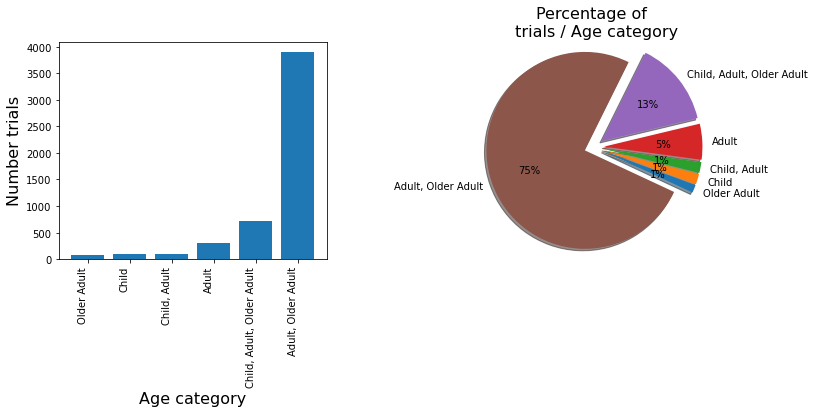

In [341]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].bar(results_by_age.Age, results_by_age['Count'])
ax[0].set_ylabel('Number trials',fontsize=16)
ax[0].set_xlabel('Age category',fontsize=16)
ax[0].set_xticklabels(results_by_age.Age,rotation=90, ha='right')
explode = (0.1,0.1,0.1,0.1, 0.1, 0.1)
ax[1].pie(results_by_age['Count'], \
          labels=results_by_age['Age'],\
          autopct='%.d%%', explode=explode, shadow=True, startangle=335)
ax[1].axis('equal')
ax[1].set_title('Percentage of \n trials / Age category', fontsize=16)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

Conclusions:
 - 89% of the clinical trials include older adults.
 - 81% of the clinical trials include adults.
 - 16% of the clinical trials include childreen.

### Trials per Gender

In [357]:
clinical_trials_reduced.columns

Index(['NCT Number', 'Status', 'Study Results', 'Gender', 'Age', 'Enrollment',
       'Study Type', 'Start Date', 'Primary Completion Date',
       'Completion Date', 'First Posted', 'Last Update Posted', 'Country',
       'Enrollment_cat', 'completion_time'],
      dtype='object')

In [342]:
results_by_gender = clinical_trials_reduced.groupby(by=['Gender'])['NCT Number'].count().sort_values().reset_index()
results_by_gender.rename(columns={'NCT Number': 'Counts'},inplace=True)
results_by_gender

,Gender,Counts
0,Male,42
1,Female,150
2,All,4984


In [354]:
4984 / 5176

0.9629057187017002

### Trials by Status

In [436]:
results_by_status = clinical_trials_reduced.groupby(by=['Status'])['NCT Number'].count().sort_values().reset_index()
results_by_status.rename(columns={'NCT Number': 'Count'},inplace=True)

/var/folders/j1/v9nyz79d7v7f5yww68cxr6tr0000gn/T/ipykernel_1481/376100264.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(results_by_status.Status,rotation=0, ha='right')


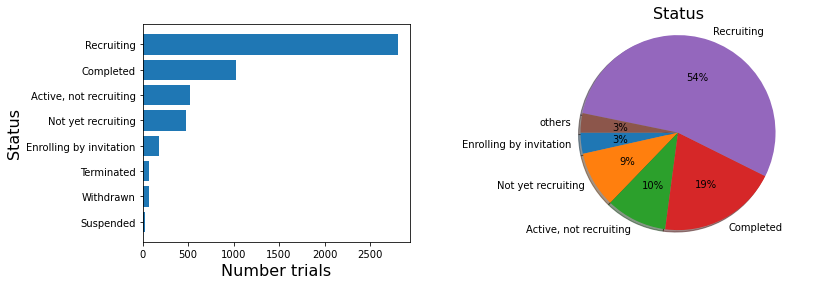

In [476]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].barh(results_by_status.Status, results_by_status['Count'])
ax[0].set_xlabel('Number trials',fontsize=16)
ax[0].set_ylabel('Status',fontsize=16)
ax[0].set_yticklabels(results_by_status.Status,rotation=0, ha='right')
explode = (0,0,0,0,0,0)

#the top 5
results_by_status_reduced = results_by_status[-5:].copy()

#others
new_row = pd.DataFrame(data = {
    'Status' : ['others'],
    'Count' : [results_by_status['Count'][:3].sum()]
})

#combining top 5 with others
results_by_status_reduced = pd.concat([results_by_status_reduced, new_row])
ax[1].pie(results_by_status_reduced['Count'], \
          labels=results_by_status_reduced['Status'],\
          autopct='%.d%%', explode=explode, shadow=True, startangle=180)
ax[1].axis('equal')
ax[1].set_title('Status', fontsize=16)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

Conclusion: 19% of the clinical trials have status completed.

### Enrollment information

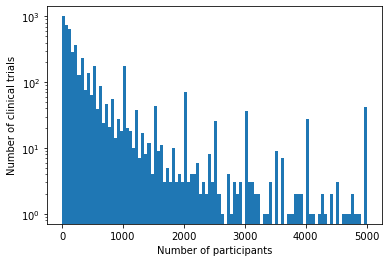

In [343]:
plt.hist(clinical_trials_reduced.Enrollment,range=(0,5000),bins=100)
plt.ylabel('Number of clinical trials')
plt.xlabel('Number of participants')
plt.yscale('log')
plt.show()

In [344]:
mean = clinical_trials_reduced.Enrollment.mean()
median = clinical_trials_reduced.Enrollment.median()
mode = clinical_trials_reduced.Enrollment.mode().iat[0]
print(f'Mean = {round(mean,0)} \nMedian = {round(median,0)} \nMode = {round(mode,0)}')

Mean = 18958.0 
Median = 176.0 
Mode = 100.0


In [345]:
def calculate_ntrials(nmin,nmax):
    return clinical_trials_reduced.Enrollment[(clinical_trials_reduced.Enrollment <= nmax) & (clinical_trials_reduced.Enrollment > nmin)].count()

I am going to create categories based on the number of partipants enroleld in the trials: A, B, C, D, and E.

In [346]:
nmins = [0,50,100,200,1000]
nmaxs = [50,100,200,1000,int(clinical_trials_reduced.Enrollment.max())]
categories = ['A','B','C','D','E']
total = 5176
for nmin,nmax,cat in zip(nmins,nmaxs,categories):
    n = calculate_ntrials(nmin,nmax)
    print(f"Number of trias above {nmin} participants and below {nmax}: {n} ({round(n/total*100,0)}%) category: {cat}")

Number of trias above 0 participants and below 50: 1080 (21.0%) category: A
Number of trias above 50 participants and below 100: 904 (17.0%) category: B
Number of trias above 100 participants and below 200: 836 (16.0%) category: C
Number of trias above 200 participants and below 1000: 1463 (28.0%) category: D
Number of trias above 1000 participants and below 20000000: 827 (16.0%) category: E


Conclusion: 43% of the clinical trials were performed with 100 or less participants.

In [347]:
def get_category(n):
    nmins = [0,50,100,200,1000]
    nmaxs = [50,100,200,1000,int(clinical_trials_reduced.Enrollment.max())]
    categories = ['A','B','C','D','E']
    for i in range(5):
        if n <= nmaxs[i] and n>nmins[i]:
            return categories[i]

clinical_trials_reduced['Enrollment_cat'] = clinical_trials_reduced.Enrollment.apply(lambda n: get_category(n))

### Investigation of time information about the trials

I want to check how long does it take for a clinical trial to end and if it depends on the number of participants.

In [348]:
clinical_trials_reduced.columns

Index(['NCT Number', 'Status', 'Study Results', 'Gender', 'Age', 'Enrollment',
       'Study Type', 'Start Date', 'Primary Completion Date',
       'Completion Date', 'First Posted', 'Last Update Posted', 'Country',
       'Enrollment_cat', 'completion_time'],
      dtype='object')

In [349]:
clinical_trials_reduced.columns

Index(['NCT Number', 'Status', 'Study Results', 'Gender', 'Age', 'Enrollment',
       'Study Type', 'Start Date', 'Primary Completion Date',
       'Completion Date', 'First Posted', 'Last Update Posted', 'Country',
       'Enrollment_cat', 'completion_time'],
      dtype='object')

In [350]:
clinical_trials_reduced['completion_time'] = (clinical_trials_reduced['Completion Date'] - clinical_trials_reduced['Start Date'])/ np.timedelta64(1, 'M')

In [351]:
average_time_complete_trial = round(clinical_trials_reduced['completion_time'].mean(),1)
print(f'Average time to complete a trial is {average_time_complete_trial} months')

Average time to complete a trial is 13.9 months


In [352]:
completion_time_per_category = clinical_trials_reduced.groupby(by='Enrollment_cat')['completion_time'].mean().reset_index()
completion_time_per_category.rename(columns={'completion_time':'Average completion time (months)'},inplace=True)
print(completion_time_per_category)

  Enrollment_cat  Average completion time (months)
0              A                          9.555113
1              B                         11.550454
2              C                         13.326546
3              D                         15.761788
4              E                         19.819878


Conclusion: On average, clinical trials with 50 or less participats take 9.6 months to complete. The more people paticipating on the clinical trials, the longer it takes to complete.

## Summary

We observed that:
 - 50% of the COVID-19 clinical trials were performed in 5 countries: US, France, UK, Spain and Italy.
 - 89% of the clinical trials include older adults.
 - 81% of the clinical trials include adults.
 - 16% of the clinical trials include childreen.
 - 19% of the clinical trials have status completed.
 - 96% of the clinical trials were performed with both male and female participants.
 - 43% of the clinical trials were performed with 100 or less participants
 - On average, clinical trials with 50 or less participats take 9.6 months to complete. The more people paticipating on the clinical trials, the longer it takes to complete.